# Example Design for a 201 pt Hankel digital linear filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import empymod as epm

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 8
figsave = False

# We want the plots to be in black and white. To not interfere with
# the white paper, we cut-off the lower 10% of the white-end from
# the colormap.
cmap = colors.LinearSegmentedColormap.from_list(
    'trunc(gray, 0.0, 0.8)',
    plt.get_cmap('gray')(np.linspace(0.0, 0.9, 256))
)

### Parameters for all data

In [3]:
fI0 = epm.fdesign.j0_1(5)
fI1 = epm.fdesign.j1_1(5)
r = np.logspace(0, 10, 1000)
r_def = (1, 1, 2)
verb = 2
plot = 0
save = True
full_output = True
fI = (fI0, fI1)
filt, out = epm.fdesign.load_filter('wer201', True)

## Create or load data with different # pts

In [4]:
inpp = {'r': r, 'r_def': r_def,
        'verb': verb, 'plot': plot, 'save': save,
        'full_output': full_output, 'fI': fI,
        'spacing': (0.005, 0.8, 50),  # Same spacing for all three plots 101/201/401
        'shift': (-9, 3, 50)}         # Same shift for all three plots 101/201/401

try:
    filt2p, out2p = epm.fdesign.load_filter('t101', True)
    filt3p, out3p = epm.fdesign.load_filter('t201', True)
    filt4p, out4p = epm.fdesign.load_filter('t401', True)
except:
    filt2p, out2p = epm.fdesign.design(n=101, name='t101', **inpp)
    filt3p, out3p = epm.fdesign.design(n=201, name='t201', **inpp)
    filt4p, out4p = epm.fdesign.design(n=401, name='t401', **inpp)

## Create or load data for 201 pt different zoom levels

In [5]:
inpz = {'r': r, 'r_def': r_def,
        'verb': verb, 'plot': plot, 'save': save,
        'full_output': full_output, 'fI': fI,
        'n': 201}  # Same filtel length for all zoom leves

try:
    filt1z, out1z = epm.fdesign.load_filter('201-1', True)
    filt2z, out2z = epm.fdesign.load_filter('201-2', True)
    filt3z, out3z = epm.fdesign.load_filter('201-3', True)
    filt4z, out4z = epm.fdesign.load_filter('201-4', True)
except:
    filt1z, out1z = epm.fdesign.design(spacing=(0.01, 0.2, 50), shift=(-4, 0, 50), name='201-1', **inpz)
    filt2z, out2z = epm.fdesign.design(spacing=(0.047, 0.08, 50), shift=(-2.4, -0.75, 50), name='201-2', **inpz)
    filt3z, out3z = epm.fdesign.design(spacing=(0.0575, 0.0675, 200), shift=(-1.5, -1.15, 200), name='201-3', **inpz)
    filt4z, out4z = epm.fdesign.design(spacing=(0.0605, 0.061, 100), shift=(-1.31, -1.29, 100), name='201-4', **inpz)

## Figure for 101, 201, and 401 points

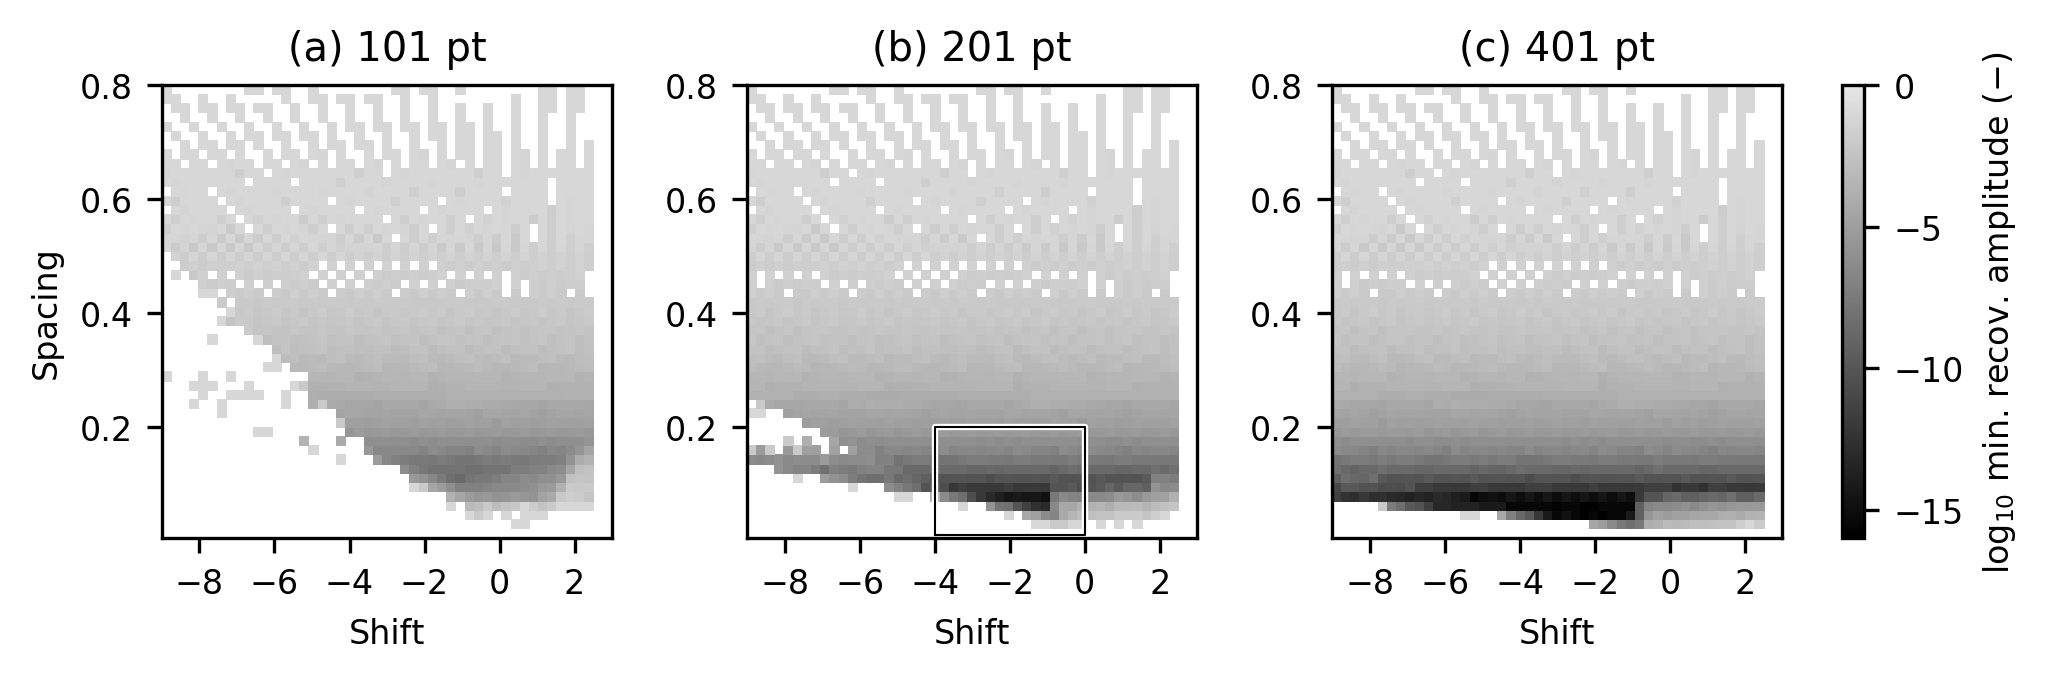

In [6]:
def plot_out(out, out2=False):
    
    # plot `out`
    cf = plt.pcolormesh(out[2][1, 0, :], out[2][0, :, 0], np.log10(out[3]), cmap=cmap,
                        linewidth=0, rasterized=True, vmin=-16, vmax=0)

    # Draw a red square if `out2` is provided
    if out2:
        minx, maxx = out2[2][1, 0, 0], out2[2][1, 0, -1]
        miny, maxy = out2[2][0, 0, 0], out2[2][0, -1, 0]
        plt.plot([minx, minx, maxx, maxx, minx], [miny, maxy, maxy, miny, miny], 'w', lw=1.52)
        plt.plot([minx, minx, maxx, maxx, minx], [miny, maxy, maxy, miny, miny], 'k', lw=0.5)
    
    # Xlabel and ticks
    plt.xlabel('Shift')
    plt.xticks([-8, -6, -4, -2, 0, 2])
    
    return cf
    
# Create figure
fig, axs = plt.subplots(figsize=(8.5, 2), nrows=1, ncols=3)
axs = axs.ravel()
plt.subplots_adjust(wspace=0.3)

# (a) 101 pt
plt.sca(axs[0])
plt.ylabel('Spacing')
plt.title('(a) 101 pt')
plot_out(out2p)

# (b) 201 pt
plt.sca(axs[1])
plt.title('(b) 201 pt')
plot_out(out3p, out1z)

# (c) 401 pt
plt.sca(axs[2])
plt.title('(c) 401 pt')
cf = plot_out(out4p)

# Plot combined colorbar
cax, kw = plt.matplotlib.colorbar.make_axes(axs, location='right', pad=0.03)
cb = plt.colorbar(cf, cax=cax, **kw)
cb.set_label(r'$\log_{10}$ min. recov. amplitude $(-)$')

# Save and show plot
if figsave:
    for ending in ['png', 'pdf', 'eps']:
        plt.savefig('../figures/Figure-2-bw.'+ending, bbox_inches='tight')
plt.show()

## Figure for 201 points with different zooms

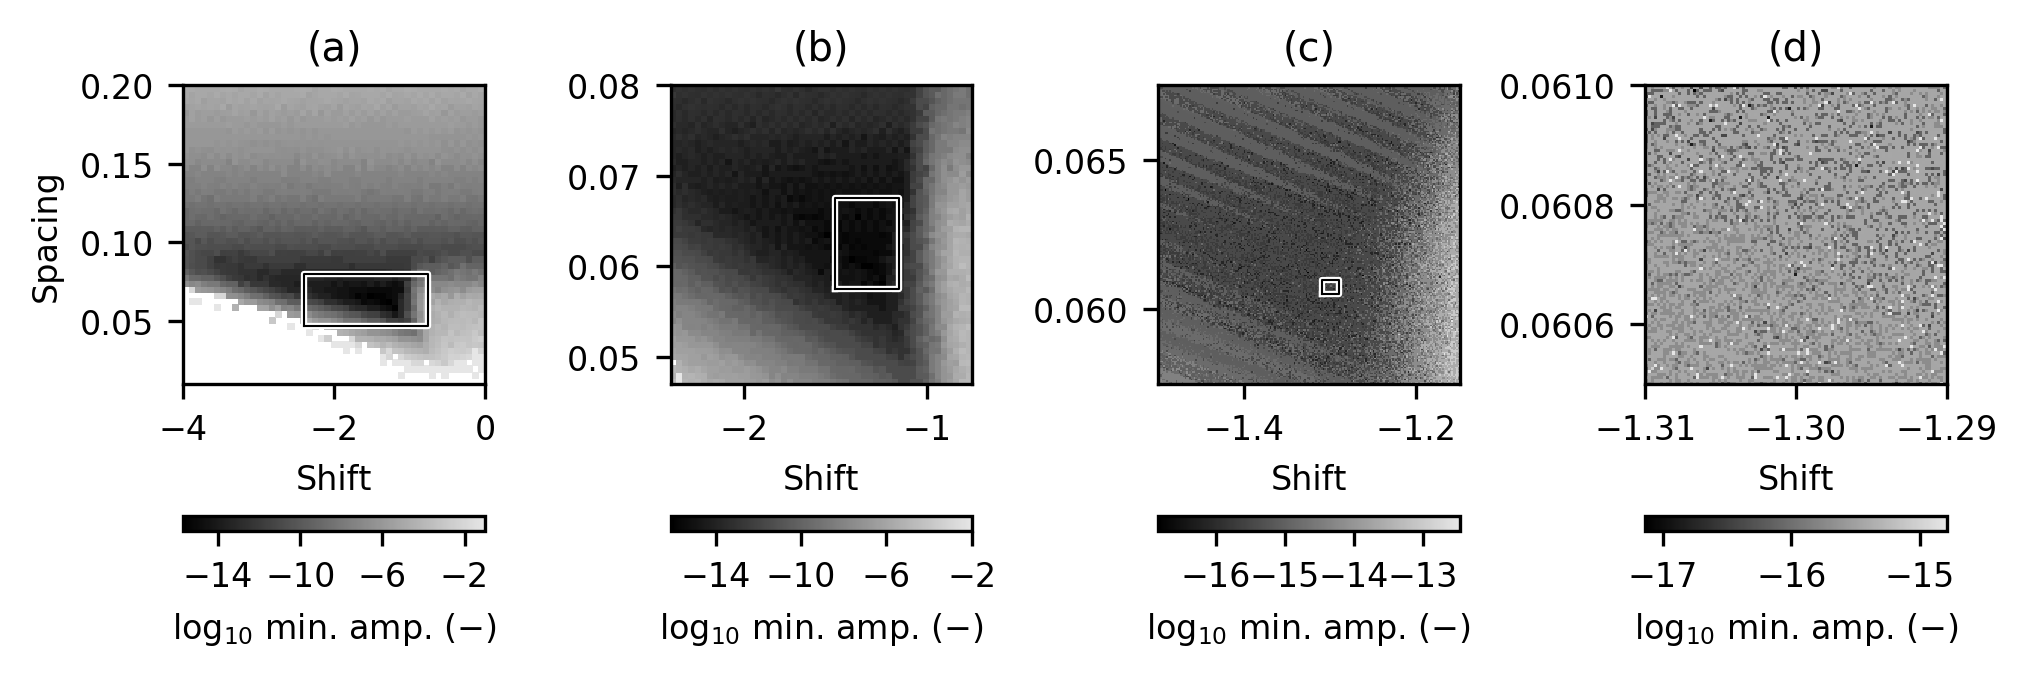

In [7]:
def plot_out(out, out2=False):
    
    # plot `out`
    plt.pcolormesh(out[2][1, 0, :], out[2][0, :, 0], np.log10(out[3]),
                   cmap=cmap, linewidth=0, rasterized=True)
    
    # Draw a red square if `out2` is provided
    if out2:
        minx, maxx = out2[2][1, 0, 0], out2[2][1, 0, -1]
        miny, maxy = out2[2][0, 0, 0], out2[2][0, -1, 0]
        plt.plot([minx, minx, maxx, maxx, minx], [miny, maxy, maxy, miny, miny], 'w', lw=1.52)
        plt.plot([minx, minx, maxx, maxx, minx], [miny, maxy, maxy, miny, miny], 'k', lw=0.5)
    
    # Xlabel
    plt.xlabel('Shift')

    # Colorbar
    if np.max(np.log10(out[3])) > 1e-12:
        ticks = [-14, -10, -6, -2]
    else:
        ticks = [-17, -16, -15, -14, -13]
    cb = plt.colorbar(ticks=ticks, orientation='horizontal', pad=0.26)
    cb.set_label(r'$\log_{10}$ min. amp. $(-)$')
    
# Create figure
fig, axs = plt.subplots(figsize=(6.8, 2.3), nrows=1, ncols=4)
axs = axs.ravel()

# (a) Overview
plt.sca(axs[0])
plt.title('(a)')
plt.ylabel('Spacing')
plot_out(out1z, out2z)

# (b) First zoom
plt.sca(axs[1])
plt.title('(b)')
plot_out(out2z, out3z)

# (c) Detail
plt.sca(axs[2])
plt.title('(c)')
plot_out(out3z, out4z)

# (d) Very detailed
plt.sca(axs[3])
plt.title('(d)')
plot_out(out4z)

plt.tight_layout()

# Save and show plot
if figsave:
    for ending in ['png', 'pdf', 'eps']:
        plt.savefig('../figures/Figure-3-bw.'+ending, bbox_inches='tight')
plt.show()

## Figure of filter and best result

In [8]:
def abs10(x):
    """Return log10(abs(x))."""
    return np.log10(np.abs(x))


def create_axis(nr, title):
    """Create subplot; do some adjustments."""
    # Create subplot and add title
    ax = plt.subplot(nr)
    ax.set_title(title)
    
    # Show horizontal gridlines, switch off frame
    ax.grid(axis='y', color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # If second subplot move y-axis to the right
    if nr > 121:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")

    return ax


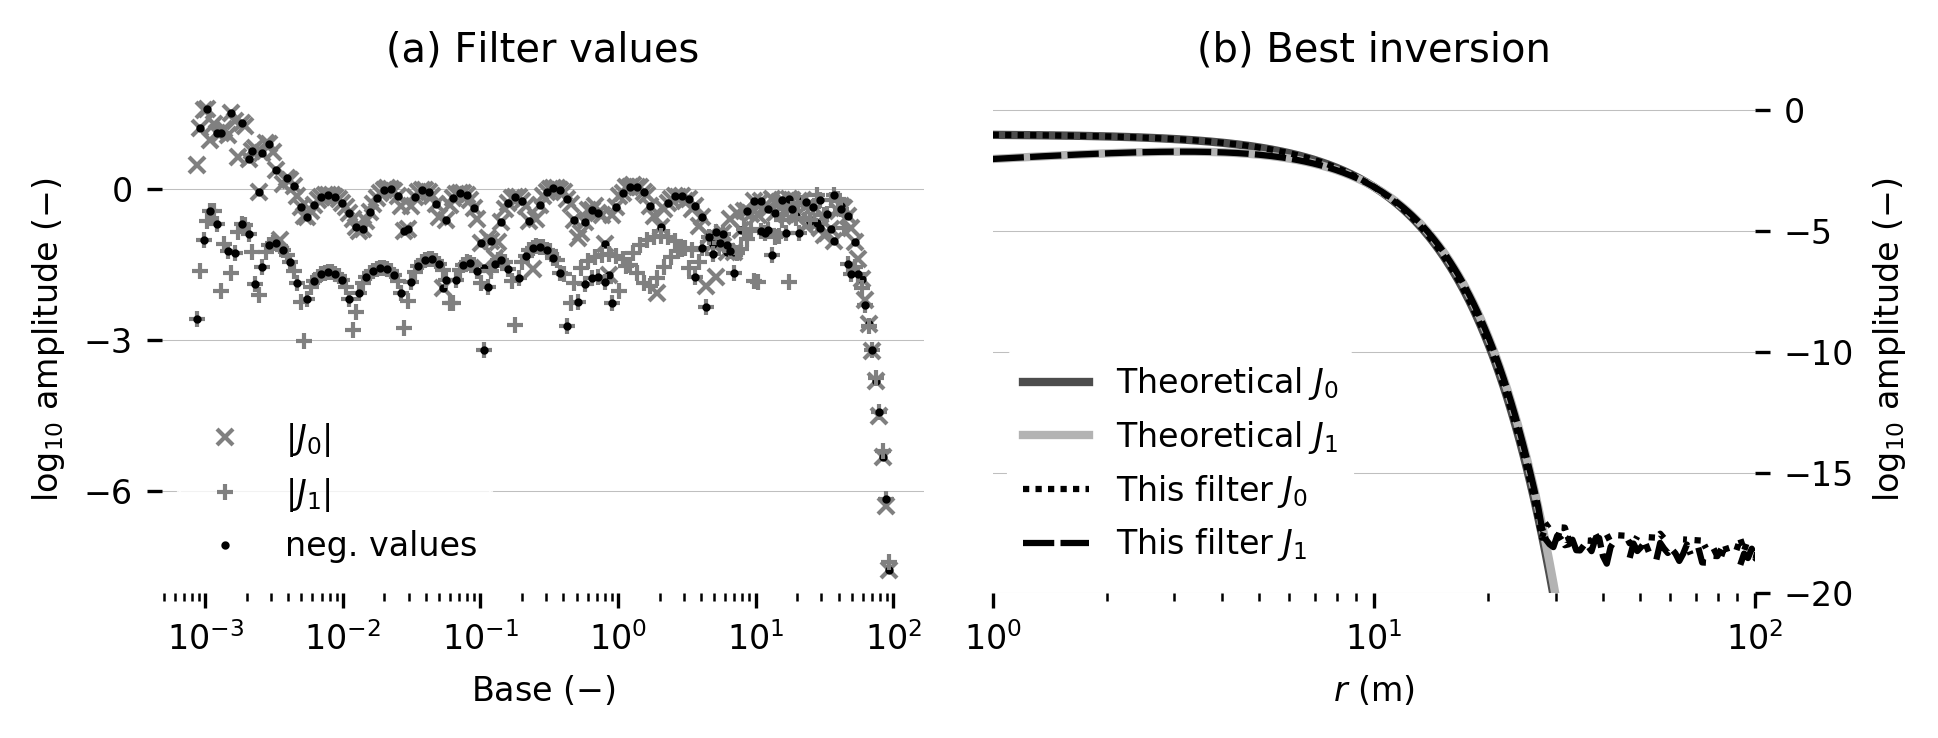

In [9]:
plt.figure(figsize=(6.5, 2.5))
plt.subplots_adjust(wspace=0.1)


# (a) Filter values
ax1 = create_axis(121, '(a) Filter values')

# J0
plt.semilogx(filt.base, abs10(filt.j0), 'x', ms=4, mec='0.5',  label=r'$|J_0|$')
plt.semilogx(filt.base, np.log10(-filt.j0), 'k.', ms=2)

# J1
plt.semilogx(filt.base, abs10(filt.j1), '+', ms=4, mec='0.5', label=r'$|J_1|$')
plt.semilogx(filt.base, np.log10(-filt.j1), 'k.', ms=2,  label='neg. values')


ax1.set_xlabel(r'Base ($-$)')
ax1.set_ylabel(r'$\log_{10}$ amplitude ($-$)')
ax1.set_yticks([0, -3, -6])

# Legend
plt.legend(loc=3, ncol=1, edgecolor='1')


# (b) Plot rhs
ax2 = create_axis(122, '(b) Best inversion')

# Transform pair rhs
plt.semilogx(r, abs10(fI0.rhs(r)), '0.3', lw=2, label='Theoretical $J_0$')
plt.semilogx(r, abs10(fI1.rhs(r)), '0.7', lw=2, label='Theoretical $J_1$')

# Calculate rhs-response with this filter
k = filt.base/r[:, None]
rhs0 = np.dot(fI0.lhs(k), filt.j0)/r
rhs1 = np.dot(fI1.lhs(k), filt.j1)/r

# Transform with filter
plt.semilogx(r, abs10(rhs0), 'k', lw=1.5, linestyle=(0, (1, 1)), label=r'This filter $J_0$')
plt.semilogx(r, abs10(rhs1), 'k', lw=1.5, linestyle=(0, (5, 1)), label=r'This filter $J_1$')

plt.ylim([-20, 1])
plt.xlim([1e0, 1e2])

plt.ylabel('$\log_{10}$ amplitude ($-$)')
plt.xlabel(r'$r$ (m)')
plt.yticks([0, -5, -10, -15, -20])
plt.legend(loc=3, ncol=1, edgecolor='1', framealpha=1)

plt.tight_layout()
# Save and show plot
if figsave:
    for ending in ['png', 'pdf', 'eps']:
        plt.savefig('../figures/Figure-4-bw.'+ending, bbox_inches='tight')
plt.show()

In [10]:
epm.versions('HTML')